In [9]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from joblib import load
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# 2. Load data and model
base_dir = Path.cwd().parent
split_path = base_dir / 'data' / 'processed' / 'train_test_split.joblib'
X_train, X_test, y_train, y_test = load(split_path)

model_path = base_dir / 'models' / 'random_forest_model.joblib'
model = load(model_path)

C:\Users\palre\anaconda3\envs\trendsense-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


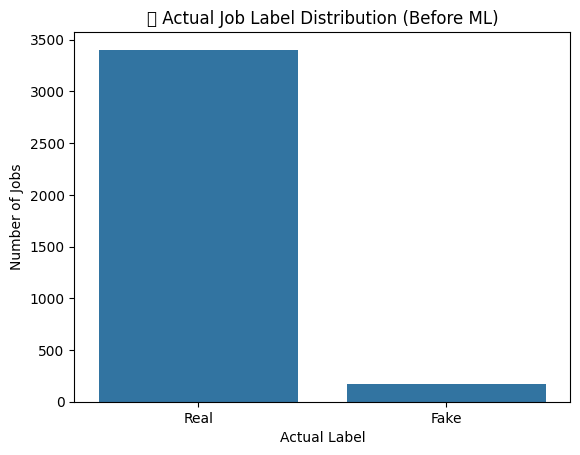

In [10]:
# 3. Predict
y_pred = model.predict(X_test)

# 4. Before ML: True label distribution
sns.countplot(x=y_test)
plt.title("🔍 Actual Job Label Distribution (Before ML)")
plt.xticks([0, 1], ["Real", "Fake"])
plt.ylabel("Number of Jobs")
plt.xlabel("Actual Label")
plt.show()

C:\Users\palre\anaconda3\envs\trendsense-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


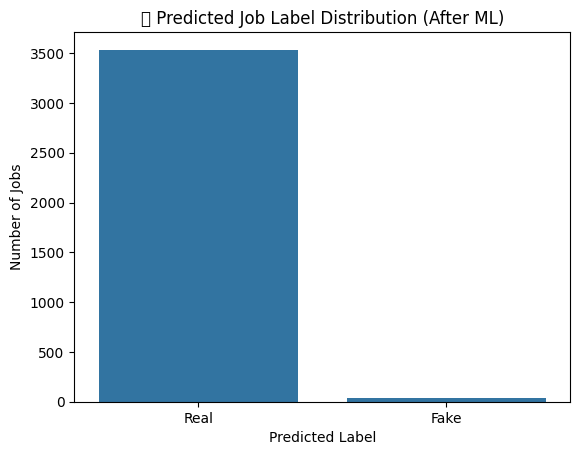

In [11]:
# 5. After ML: Predicted label distribution
sns.countplot(x=y_pred)
plt.title("🤖 Predicted Job Label Distribution (After ML)")
plt.xticks([0, 1], ["Real", "Fake"])
plt.ylabel("Number of Jobs")
plt.xlabel("Predicted Label")
plt.show()

C:\Users\palre\anaconda3\envs\trendsense-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


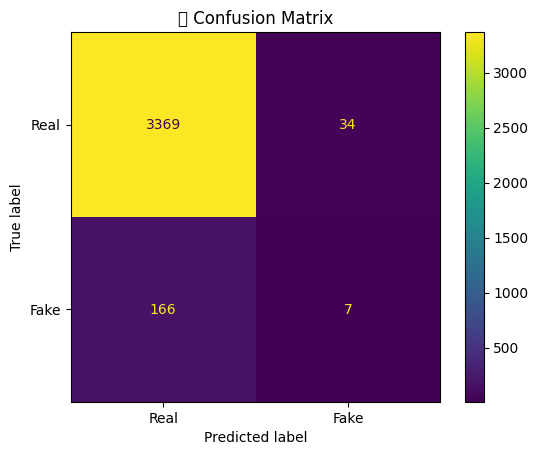

📋 Classification Report:
              precision    recall  f1-score   support

        Real       0.95      0.99      0.97      3403
        Fake       0.17      0.04      0.07       173

    accuracy                           0.94      3576
   macro avg       0.56      0.52      0.52      3576
weighted avg       0.92      0.94      0.93      3576



In [12]:
# 6. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Real", "Fake"])
plt.title("🧩 Confusion Matrix")
plt.show()

# 7. Classification Report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Real", "Fake"]))